In [14]:

import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# data cleaning process begins......


In [15]:
img=cv2.imread(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\dataset\maria sharapova\sharapova-hits-the-practice-courts-and-met-ball-kids (1).jpg")
img.shape

(555, 700, 3)

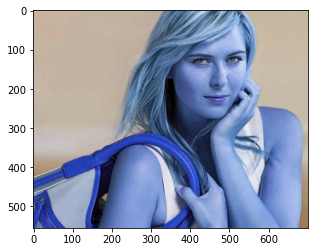

In [16]:
plt.imshow(img)

In [17]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

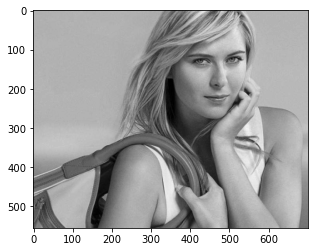

In [18]:
plt.imshow(gray,cmap='gray')

In [19]:
#detect face and eyes using haar cascades 
face_cascade=cv2.CascadeClassifier(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\openCv\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\openCv\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]])

In [20]:
(x,y,w,h)=faces[0]
x,y,w,h     #w is width and h is height 

(352, 38, 233, 233)

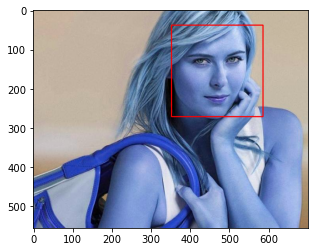

In [21]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

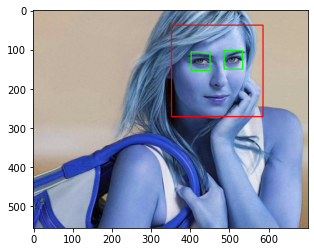

In [22]:
#detect two eyes
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()
    

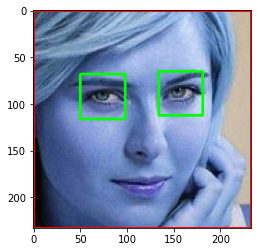

In [23]:
%matplotlib inline 
plt.imshow(roi_color,cmap='gray')

In [24]:
#lets create the above code as a function so, i can run it for all images
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    

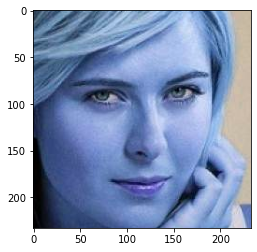

In [25]:
cropped_image=get_cropped_image_if_2_eyes(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\dataset\maria sharapova\sharapova-hits-the-practice-courts-and-met-ball-kids (1).jpg")
plt.imshow(cropped_image)

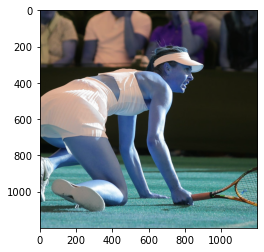

In [26]:
org_image_obstructed=cv2.imread(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\dataset\maria sharapova\2900.jpg")
plt.imshow(org_image_obstructed)

In [27]:
#since the face is obstruced we get no cropped images 
cropped_image_no_eyes=get_cropped_image_if_2_eyes(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\maria sharapova\2900.jpg")
cropped_image_no_eyes

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [28]:
path_to_data= "C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/"
path_to_cr_data="C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/"

In [29]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
img_dirs

['C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/maria sharapova',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/messi',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/roger',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/sere williams',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/virat kohli']

In [31]:
#create a folder od cropped images 
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

cropped
maria sharapova
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova
messi
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/messi
roger
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/roger
sere williams
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/sere williams
virat kohli
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/virat kohli


In [43]:

import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
img = cv2.imread(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\dataset\maria sharapova\sharapova-hits-the-practice-courts-and-met-ball-kids (1).jpg")
img.shape

(555, 700, 3)

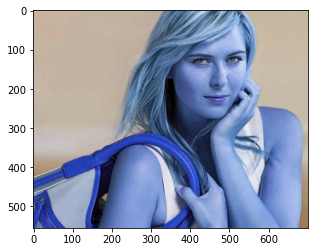

In [45]:

plt.imshow(img)

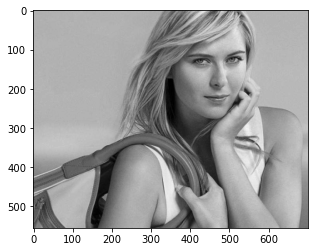

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

plt.imshow(gray, cmap='gray')

In [51]:
face_cascade=cv2.CascadeClassifier(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\openCv\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(r"C:\Users\kriti\OneDrive - Manipal Academy of Higher Education\Desktop\sports\openCv\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]])

In [52]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

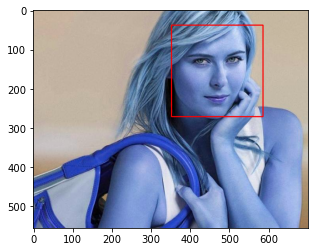

In [53]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

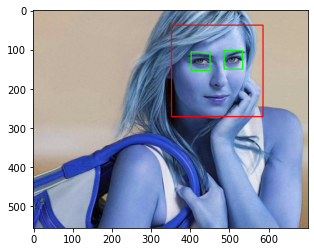

In [54]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

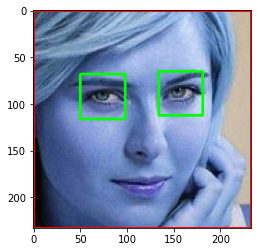

In [55]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [56]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

#    wavelet transform           

In [57]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

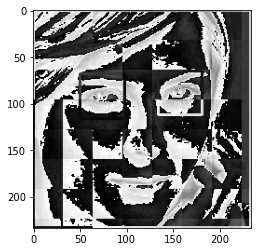

In [58]:

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

# now we will vertically stack the raw image and the wavelet transform image, this will be the input to our classifier 


In [80]:
path_to_data= "C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/"
path_to_cr_data="C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/"

In [82]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [83]:
img_dirs

['C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/maria sharapova',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/messi',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/roger',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/sere williams',
 'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/virat kohli']

In [84]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [85]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/messi
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/roger
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/sere williams
Generating cropped images in folder:  C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/virat kohli


In [98]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'maria sharapova': ['C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova\\maria sharapova1.png',
  'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova\\maria sharapova10.png',
  'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova\\maria sharapova11.png',
  'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova\\maria sharapova13.png',
  'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova\\maria sharapova14.png',
  'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova\\maria sharapova15.png',
  'C:/Users/kriti/OneDrive - Manipal Academy of Higher Education/Desktop/sports/dataset/cropped/maria sharapova\\maria sharapova16.png',
  'C:/Users/kriti/OneDr

In [99]:

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria sharapova': 0,
 'messi': 1,
 'roger': 2,
 'sere williams': 3,
 'virat kohli': 4}

In [100]:

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [101]:

len(X[0])

4096

In [102]:
X[0]

array([[ 62],
       [110],
       [122],
       ...,
       [ 33],
       [ 19],
       [251]], dtype=uint8)

In [103]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

# data cleaning is done, time to train our model

In [104]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8333333333333334

In [106]:
len(X_test)

42

In [107]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.89      0.80      0.84        10
           2       0.83      0.71      0.77         7
           3       0.67      0.86      0.75         7
           4       0.83      0.91      0.87        11

    accuracy                           0.83        42
   macro avg       0.84      0.83      0.83        42
weighted avg       0.85      0.83      0.84        42



# grid search cv to find which model is the best fit 



In [109]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [110]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [111]:

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.816308,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.705846,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.864308,{'logisticregression__C': 1}


In [112]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [113]:
best_clf=best_estimators['svm']

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 1, 0, 0],
       [0, 9, 0, 1, 0],
       [0, 0, 5, 2, 0],
       [0, 0, 1, 6, 0],
       [0, 2, 0, 0, 9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

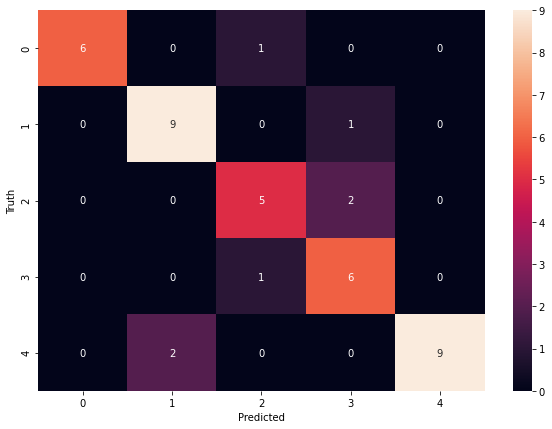

In [115]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# save the model

In [116]:
!pip install joblib 
import joblib 

joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

# save class dictionary 

In [119]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))